In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Scripts.Model import *
from Scripts.Parameters import N, memory_size, code_length
from copy import deepcopy

In [ ]:
statistics_varying_kappa = {}
for kappa in [0, 1, 5, 10, 15, 20, 25, 30, 35,40, 45, 50]:
    model = initialize_model(N, pa, mu, m, kappa, lambd, alpha, omega, gamma)
    _, _, mean_statistics = evaluateModel(model, T, num_repetitions = num_repetitions)
    statistics_varying_kappa[kappa] = deepcopy(mean_statistics)
    print("")

In [8]:
import matplotlib.pyplot as plt

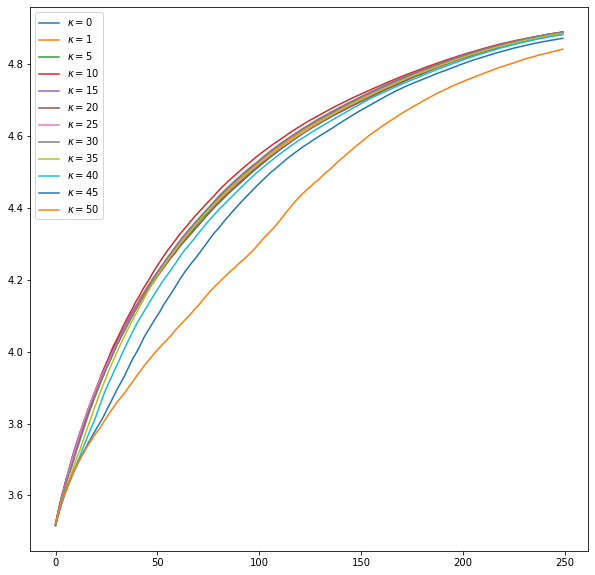

In [18]:
fig, axs = plt.subplots(figsize = (10, 10))
X = range(T)
for kappa in statistics_varying_kappa.keys():
    axs.plot(X, statistics_varying_kappa[kappa]['Entropy'], label = r'$\kappa = {}$'.format(kappa))
    
axs.legend()

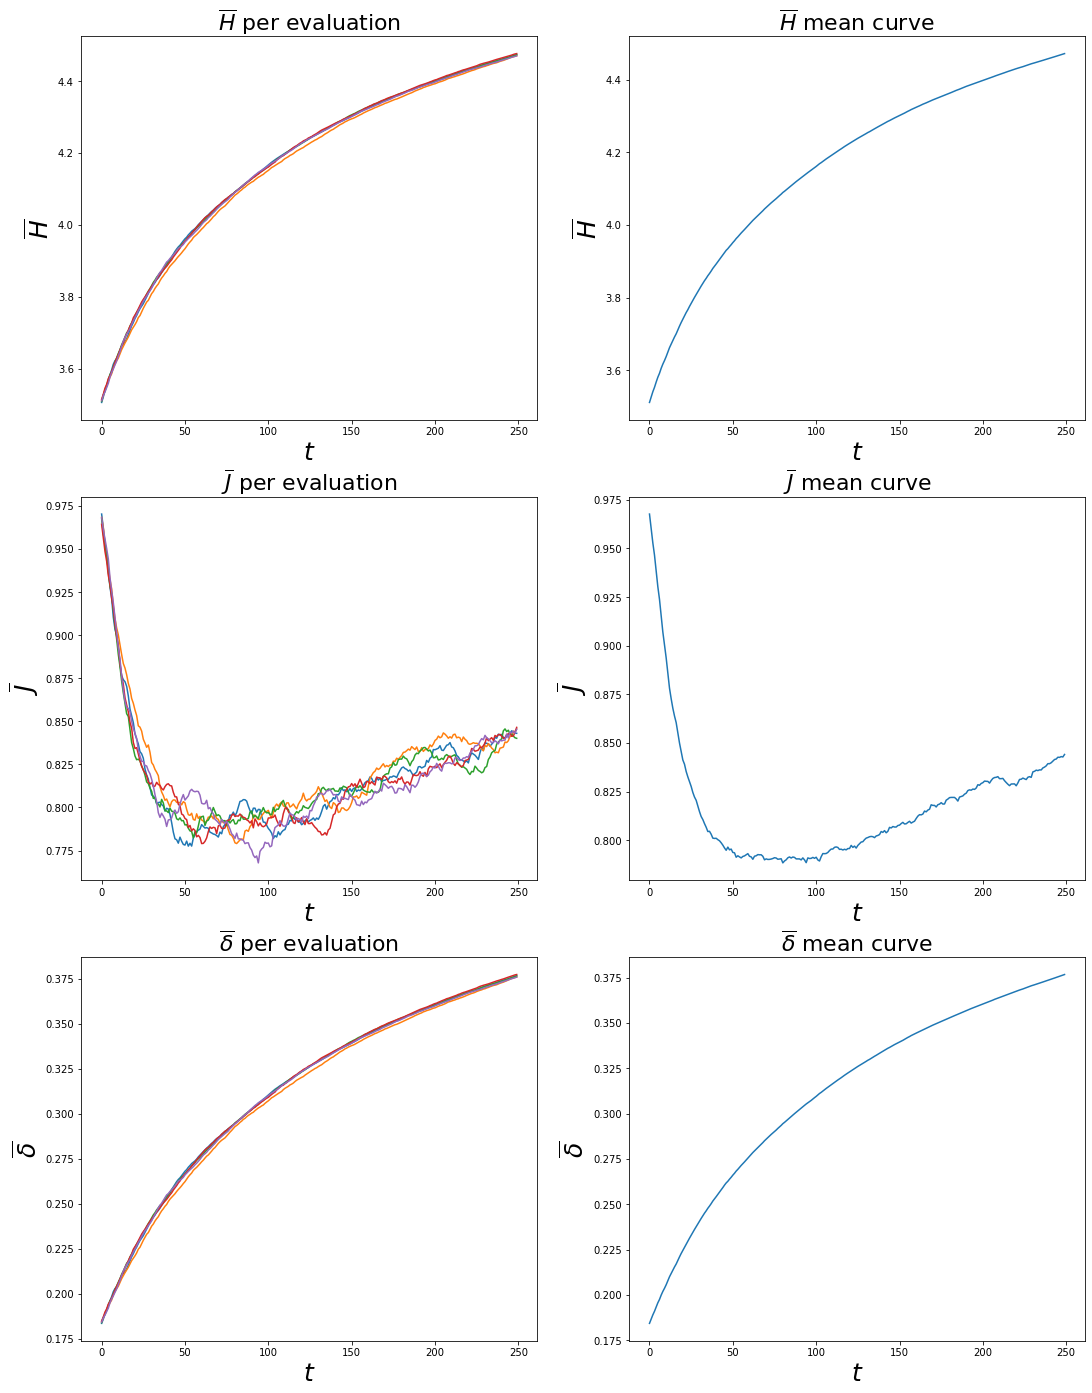

In [91]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 24))

axs[0][0].set_ylabel(r'$\overline{H}$', fontsize = 25)
axs[0][0].set_xlabel(r'$t$', fontsize = 25)
axs[0][0].set_title(r'$\overline{H}$ per evaluation', fontsize = 22)
 
axs[0][1].set_ylabel(r'$\overline{H}$', fontsize = 25)
axs[0][1].set_xlabel(r'$t$', fontsize = 25)
axs[0][1].set_title(r'$\overline{H}$ mean curve', fontsize = 22)

X = range(T)

for rep_stats in rep_statistics:
    axs[0][0].plot(X, rep_stats['Entropy'])
    
axs[0][1].plot(X, mean_statistics['Entropy'])


axs[1][0].set_ylabel(r'$\overline{J}$', fontsize = 25)
axs[1][0].set_xlabel(r'$t$', fontsize = 25)
axs[1][0].set_title(r'$\overline{J}$ per evaluation', fontsize = 22)

axs[1][1].set_ylabel(r'$\overline{J}$', fontsize = 25)
axs[1][1].set_xlabel(r'$t$', fontsize = 25)
axs[1][1].set_title(r'$\overline{J}$ mean curve', fontsize = 22)

for rep_stats in rep_statistics:
    axs[1][0].plot(X, rep_stats['Proximity'])
    
axs[1][1].plot(X, mean_statistics['Proximity'])

axs[2][0].set_ylabel(r'$\overline{\delta}$', fontsize = 25)
axs[2][0].set_xlabel(r'$t$', fontsize = 25)
axs[2][0].set_title(r'$\overline{\delta}$ per evaluation', fontsize = 22)

axs[2][1].set_ylabel(r'$\overline{\delta}$', fontsize = 25)
axs[2][1].set_xlabel(r'$t$', fontsize = 25)
axs[2][1].set_title(r'$\overline{\delta}$ mean curve', fontsize = 22)

for rep_stats in rep_statistics:
    axs[2][0].plot(X, rep_stats['Delta'])

axs[2][1].plot(X, mean_statistics['Delta'])

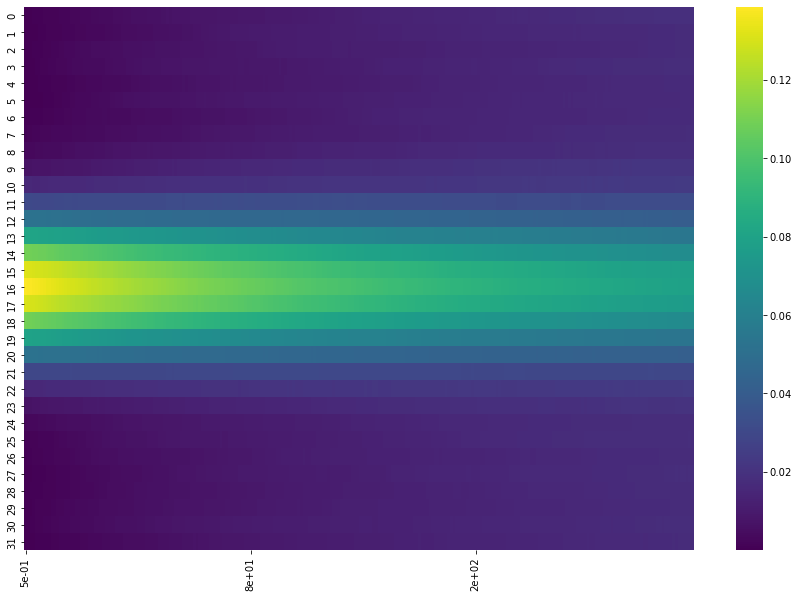

In [92]:
fig, ax = heat_plot(mean_statistics['Distribution'].T, cmap = 'viridis')

***